DECISION TREES

In [1]:
import pandas as pd
import numpy as np 


In [32]:
df = pd.read_csv("../data/spambase_augmented.csv") 

EDA

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 1186 entries, 0.000 to 1
dtypes: float64(1185), int64(1)
memory usage: 41.6 MB


In [34]:
#print(df.isnull().sum())
print(df.duplicated().sum())

391


In [35]:
df.iloc[:,-1].value_counts()

1
0    2788
1    1812
Name: count, dtype: int64

VARY TRAINING SIZE

In [36]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   

In [37]:
print(df.shape)
print(X.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
print(X_train.shape, y_train.shape, X_test.shape, X_test.shape)

(3680, 1185) (3680,) (920, 1185) (920, 1185)


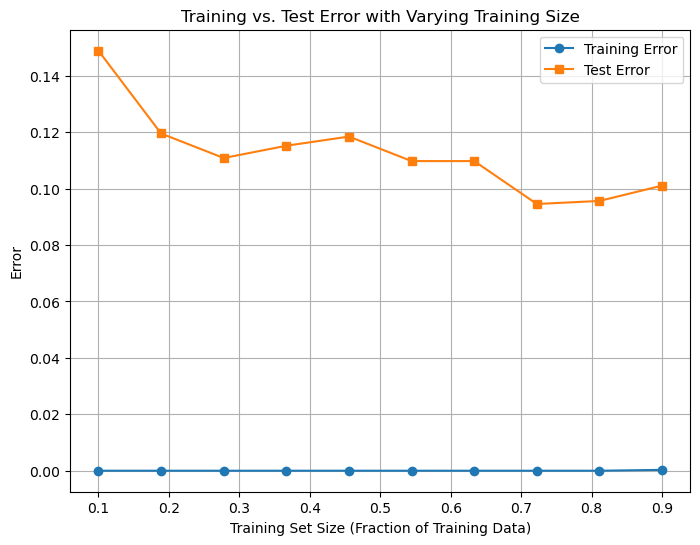

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_sizes = np.linspace(0.1, 0.9, 10)  # Varies from 10% to 90% of available training data

train_errors = []
test_errors = []

for size in train_sizes:
    # Take a subset of the training data
    X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Train a decision tree
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train_small, y_train_small)

    # Compute training error
    train_error = 1 - accuracy_score(y_train_small, tree.predict(X_train_small))
    train_errors.append(train_error)

    # Compute test error
    test_error = 1 - accuracy_score(y_test, tree.predict(X_test))
    test_errors.append(test_error)

# Plot Training vs. Test Error
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label="Training Error", marker='o')
plt.plot(train_sizes, test_errors, label="Test Error", marker='s')
plt.xlabel("Training Set Size (Fraction of Training Data)")
plt.ylabel("Error")
plt.title("Training vs. Test Error with Varying Training Size")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

# Define X and y using iloc (since there are no column names)
X = df.iloc[:, :-1]  # Features (all except last column)
y = df.iloc[:, -1]   # Target (last column)

# Split into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Train a fully grown decision tree
tree = DecisionTreeClassifier(random_state=42)  # No depth limit (overfitting expected)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [43]:
import numpy as np
from sklearn.metrics import accuracy_score

# Get initial validation accuracy
val_accuracy = accuracy_score(y_val, tree.predict(X_val))

# Try reducing max depth iteratively and check validation accuracy
best_depth = None
best_accuracy = val_accuracy

for depth in range(1, 20):  # Try different depths
    pruned_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    pruned_tree.fit(X_train, y_train)
    
    new_accuracy = accuracy_score(y_val, pruned_tree.predict(X_val))
    
    if new_accuracy >= best_accuracy:  # Keep pruning if accuracy stays the same or improves
        best_accuracy = new_accuracy
        best_depth = depth
    else:
        break  # Stop pruning when accuracy decreases

print(f"Optimal depth after pruning: {best_depth}")


Optimal depth after pruning: None


In [44]:
# Train pruned decision tree
pruned_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
pruned_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [45]:
# Compute errors
train_error_before = 1 - accuracy_score(y_train, tree.predict(X_train))
val_error_before = 1 - accuracy_score(y_val, tree.predict(X_val))
test_error_before = 1 - accuracy_score(y_test, tree.predict(X_test))

train_error_after = 1 - accuracy_score(y_train, pruned_tree.predict(X_train))
val_error_after = 1 - accuracy_score(y_val, pruned_tree.predict(X_val))
test_error_after = 1 - accuracy_score(y_test, pruned_tree.predict(X_test))

print(f"Training Error Before Pruning: {train_error_before:.4f}, After Pruning: {train_error_after:.4f}")
print(f"Validation Error Before Pruning: {val_error_before:.4f}, After Pruning: {val_error_after:.4f}")
print(f"Test Error Before Pruning: {test_error_before:.4f}, After Pruning: {test_error_after:.4f}")


Training Error Before Pruning: 0.0007, After Pruning: 0.0007
Validation Error Before Pruning: 0.0761, After Pruning: 0.0761
Test Error Before Pruning: 0.0859, After Pruning: 0.0859


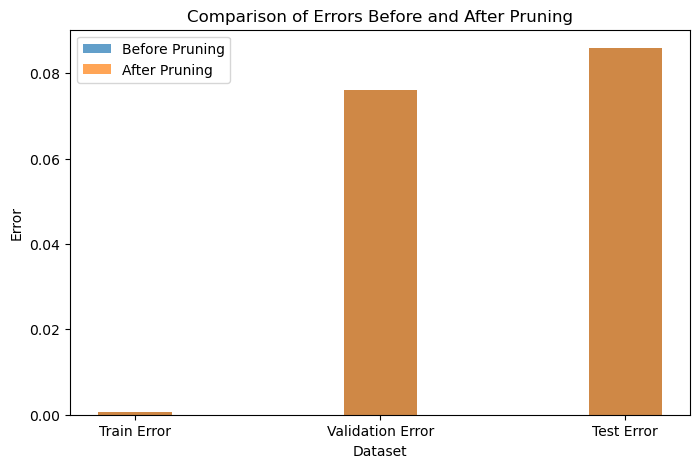

In [46]:
import matplotlib.pyplot as plt

errors_before = [train_error_before, val_error_before, test_error_before]
errors_after = [train_error_after, val_error_after, test_error_after]
labels = ["Train Error", "Validation Error", "Test Error"]

plt.figure(figsize=(8, 5))
plt.bar(labels, errors_before, width=0.3, label="Before Pruning", alpha=0.7)
plt.bar(labels, errors_after, width=0.3, label="After Pruning", alpha=0.7)
plt.xlabel("Dataset")
plt.ylabel("Error")
plt.title("Comparison of Errors Before and After Pruning")
plt.legend()
plt.show()


In [ ]:
s